# Extracting Neutron and Photon Multiplicity Distributions

<i>Last version: Oct. 29, 2020</li>

Prompt neutron and photon multiplicity distributions can be easily extracted from fission event files created by the CGMF code. Below we show an example of built-in functions provided in the **CGMFtk** Python package, as well as manual manipulations of the event file to reconstruct the same results.

Also, the importance of defining the detector energy threshold and time coincidence window around the fission event is also discussed.

In [1]:
### initializations and import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
%pylab inline

from CGMFtk import histories as fh

Populating the interactive namespace from numpy and matplotlib


In [2]:
### rcParams are the default parameters for matplotlib
import matplotlib as mpl

print ("Matplotbib Version: ", mpl.__version__)

mpl.rcParams['font.size'] = 18
mpl.rcParams['font.family'] = 'Helvetica', 'serif'
#mpl.rcParams['font.color'] = 'darkred'
mpl.rcParams['font.weight'] = 'normal'

mpl.rcParams['axes.labelsize'] = 18.
mpl.rcParams['xtick.labelsize'] = 18.
mpl.rcParams['ytick.labelsize'] = 18.
mpl.rcParams['lines.linewidth'] = 2.

font = {'family' : 'serif',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 18,
        }

mpl.rcParams['xtick.major.pad']='10'
mpl.rcParams['ytick.major.pad']='10'

mpl.rcParams['image.cmap'] = 'inferno'

Matplotbib Version:  3.1.3


## Reading fission events file

In [3]:
hist = fh.Histories('98252sf.cgmf')

98252sf.cgmf


$h$ now contains all fission events, as calculated by CGMF in this particular example file.

## Inferring $P(\nu)$ and $P(N_\gamma)$

The neutron and $\gamma$-ray multiplicity distributions can be easily accessed by invoking built-in functions from the **CGMFtk** package:

In [4]:
print ("Neutrons: ", hist.Pnu())
print ("Gamma Rays: ", hist.Pnug())

Neutrons:  (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([2.33200e-03, 1.20720e-02, 1.08506e-01, 2.58974e-01, 3.37622e-01,
       2.27606e-01, 4.73280e-02, 5.36000e-03, 1.96000e-04, 4.00000e-06]))
Gamma Rays:  (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]), array([1.66800e-03, 6.34400e-03, 1.72960e-02, 3.58580e-02, 6.05880e-02,
       8.58900e-02, 1.07336e-01, 1.18104e-01, 1.18238e-01, 1.10204e-01,
       9.37640e-02, 7.47020e-02, 5.63660e-02, 4.11320e-02, 2.76920e-02,
       1.76760e-02, 1.08940e-02, 6.93600e-03, 4.04200e-03, 2.31800e-03,
       1.34800e-03, 7.40000e-04, 3.68000e-04, 2.54000e-04, 1.08000e-04,
       5.20000e-05, 2.80000e-05, 2.20000e-05, 1.40000e-05, 1.00000e-05,
       2.00000e-06, 4.00000e-06, 2.00000e-06]))


and plotting them using:

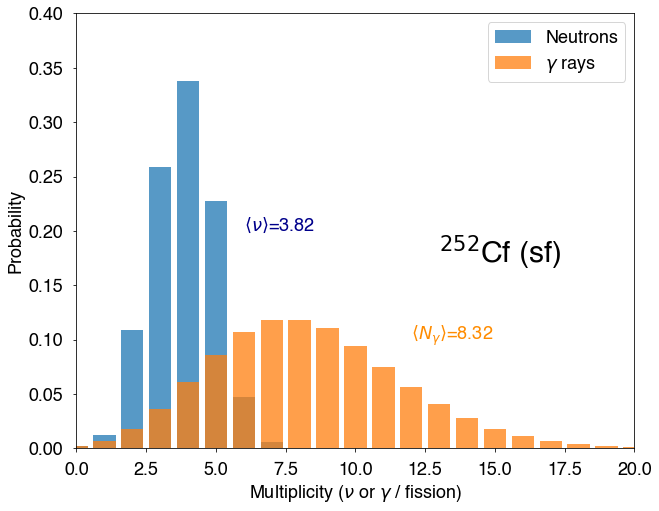

In [7]:
fig=figure(figsize(10,8))

ax=plt.subplot(1,1,1)

nu,Pnu = hist.Pnu()
plt.bar(nu,Pnu,label="Neutrons",alpha=0.75)
plt.text(6,0.2,r"$\langle \nu \rangle$={0:4.2f}".format(hist.nubar()*2),color="darkblue")

nug,Pnug = hist.Pnug()
plt.bar(nug,Pnug,label=r"$\gamma$ rays",alpha=0.75)
plt.text(12,0.1,r"$\langle N_\gamma \rangle$={0:4.2f}".format(hist.nubarg()*2),color="darkorange")

plt.xlim(0,20)
plt.xlabel(r"Multiplicity ($\nu$ or $\gamma$ / fission)")
plt.ylim(0,0.4)
plt.ylabel("Probability")

plt.text(13,0.17,r"$^{252}$Cf (sf)",fontsize=30)
lg=plt.legend()

plt.show()

In that case, we also used the functions to calculate the mean values of the neutron and $\gamma$ multiplicity distributions respectively, `hist.nubar()` and `hist.nubarg()`. Note that those functions return the mean values for each fission fragment decay, so they need to be multiplied by two to get the mean values for a fission event, with two fission fragments.  The neutron and $\gamma$ multiplicity averages for each event can be calculated with `hist.nubartot()` and `hist.nubargtot()`.

## Manually

The same information can of course be extracted by direct analysis of the fission events, as follows:

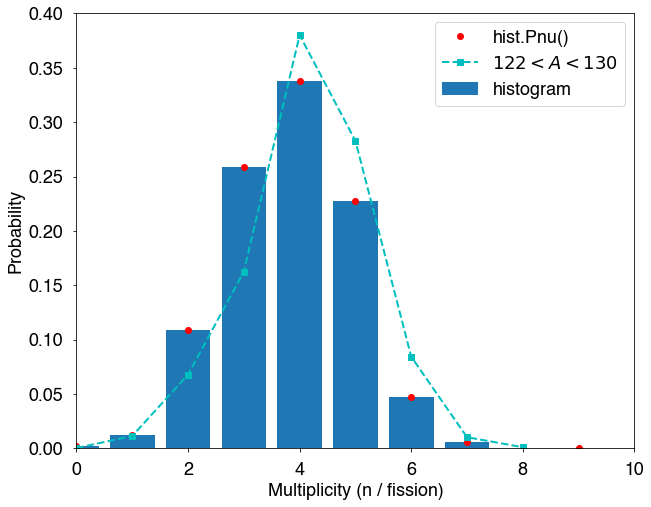

In [14]:
#-- Building an histogram of the sum of the neutron multiplicities for 
#-- both light and heavy fragments

nu,Pnu = hist.Pnu()
data=np.histogram(hist.getNu()[::2]+hist.getNu()[1::2],bins=nu,density=True)

#-- The advantage is that one can easily apply some masks to the histograms
#-- For instance, counting only neutrons from fragments with mass greater than 130
mask=np.logical_and(hist.getA()>122,hist.getA()<130)
hmasked=hist.getNu()[mask]
datamasked=np.histogram(hmasked[::2]+hmasked[1::2],bins=nu,density=True)

fig=figure(figsize(10,8))

ax=plt.subplot(1,1,1)

plt.bar(nu[:-1],data[0][:],label="histogram")
plt.plot(nu,Pnu,'ro',label="hist.Pnu()")
plt.plot(nu[:-1],datamasked[0][:],'cs--',label="$122<A<130$")

plt.xlim(0,10)
plt.xlabel("Multiplicity (n / fission)")
plt.ylim(0,0.4)
plt.ylabel("Probability")

plt.legend()
plt.show()

The average $\gamma$-ray multiplicity is very sensitive to the detection energy threshold as well as the time coincidence window with the fission event.

$\gamma$-ray timinig is discussed in another example.  However, several of the methods in **CGMFtk.Histories** already contain easy ways to take the $\gamma$-ray threshold energy into account

In [18]:
nug,Pnug = hist.Pnug()
nug005,Pnug005 = hist.Pnug(Eth=0.05) # 50 keV gamma-ray threshold energy
nug010,Pnug010 = hist.Pnug(Eth=0.1) # 100 keV gamma-ray threshold energy
nug015,Pnug015 = hist.Pnug(Eth=0.15) # 150 keV gamma-ray threshold energy

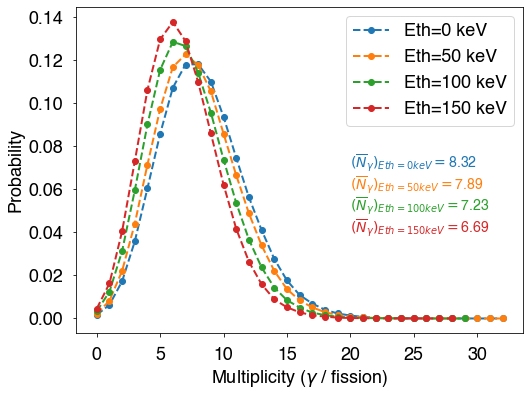

In [24]:
# calculate the average gamma multiplicity with each energy threshold
Ng0 = np.sum(nug*Pnug)
Ng005 = np.sum(nug005*Pnug005)
Ng010 = np.sum(nug010*Pnug010)
Ng015 = np.sum(nug015*Pnug015)

fig = plt.figure(figsize=(8,6))
plt.plot(nug,Pnug,'o--',label='Eth=0 keV')
plt.plot(nug005,Pnug005,'o--',label='Eth=50 keV')
plt.plot(nug010,Pnug010,'o--',label='Eth=100 keV')
plt.plot(nug015,Pnug015,'o--',label='Eth=150 keV')
plt.text(20,0.07,r'$(\overline{N}_\gamma)_{Eth=0 keV}=$'+str(round(Ng0,2)),fontsize=14,color='C0')
plt.text(20,0.06,r'$(\overline{N}_\gamma)_{Eth=50 keV}=$'+str(round(Ng005,2)),fontsize=14,color='C1')
plt.text(20,0.05,r'$(\overline{N}_\gamma)_{Eth=100 keV}=$'+str(round(Ng010,2)),fontsize=14,color='C2')
plt.text(20,0.04,r'$(\overline{N}_\gamma)_{Eth=150 keV}=$'+str(round(Ng015,2)),fontsize=14,color='C3')
plt.xlabel('Multiplicity ($\gamma$ / fission)')
plt.ylabel('Probability')
plt.legend()
plt.show()